|Challenge Set |**2 **                                 |
|-------------:|:--------------------------------------|
|Topic:        |Linear Regression and Train/Test Split |
|Date:         |07/17/2016                             | 
|Name:         |Bryant Biggs                           |
|Worked with:  |N/A                                    |
---
# WRITTEN FOR PYTHON 3
---

In [255]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import csv
from datetime import datetime
import pandas as pd

In [256]:
data_file = 'data.csv'

# read in data and select columns of interest
df = pd.read_csv(data_file, encoding='utf-8')
df['Released'] = pd.to_datetime(df['Released'])
df['Prod_Budget'] = pd.to_numeric(df['Prod_Budget'])
df['Dom_Gross'] = pd.to_numeric(df['Dom_Gross'])
df['World_Gross'] = pd.to_numeric(df['World_Gross'])

assert df['Released'].dtype == 'datetime64[ns]'
assert df['Prod_Budget'].dtype == 'int64'
assert df['Dom_Gross'].dtype == 'int64'
assert df['World_Gross'].dtype == 'int64'

df = df[['Title', 'Prod_Budget', 'Dom_Gross', 'World_Gross', 'Released', 'Rated', 'Runtime', 'Genre', 'Director']]
df.head()

,Title,Prod_Budget,Dom_Gross,World_Gross,Released,Rated,Runtime,Genre,Director
0,Avatar,425000000,760507625,2783918982,2009-12-18,PG-13,162,"Action, Adventure, Fantasy",James Cameron
1,Spectre,300000000,200074175,879620923,2015-11-06,PG-13,148,"Action, Adventure, Thriller",Sam Mendes
2,The Dark Knight Rises,275000000,448139099,1084439099,2012-07-20,PG-13,164,"Action, Adventure, Drama",Christopher Nolan
3,John Carter,275000000,73058679,282778100,2012-03-09,PG-13,132,"Action, Adventure, Sci-Fi",Andrew Stanton
4,Tangled,260000000,200821936,586581936,2010-11-24,PG,100,"Animation, Adventure, Comedy","Nathan Greno, Byron Howard"


# Challenge 1
Plot domestic total gross over time.

In [257]:
# group any movies that were released on same date
df_1 = df.groupby(['Released'])['Dom_Gross'].sum().reset_index()
df_1 = df_1.sort_values('Released')
df_1['Dom_Gross'] = df_1['Dom_Gross']/1000000
df_1 = df_1.set_index(df_1.Released)

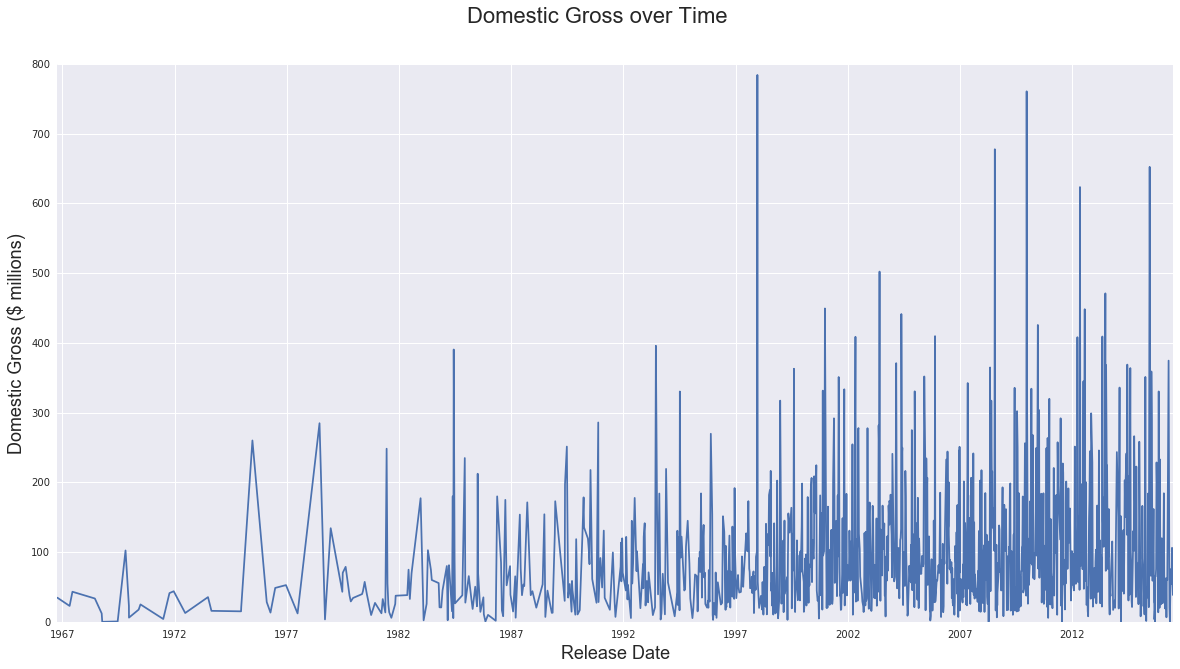

In [258]:
# difficult to see trend when plotted by date released
plt.figure(figsize=(20,10))
plt.suptitle('Domestic Gross over Time',fontsize=22)
plt.ylabel('Domestic Gross ($ millions)',fontsize=18)
plt.xlabel('Release Date',fontsize=18)
sns.set_style("darkgrid")
plt.plot(df_1.Released, df_1.Dom_Gross)
plt.show()

In [259]:
# group movies by year they were released within
df_1['Year'] = pd.DatetimeIndex(df_1['Released']).year
df_1A = df_1.groupby(['Year'])['Dom_Gross'].sum().reset_index()
df_1A = df_1A.sort_values('Year')
df_1A = df_1A.set_index(df_1A.Year)

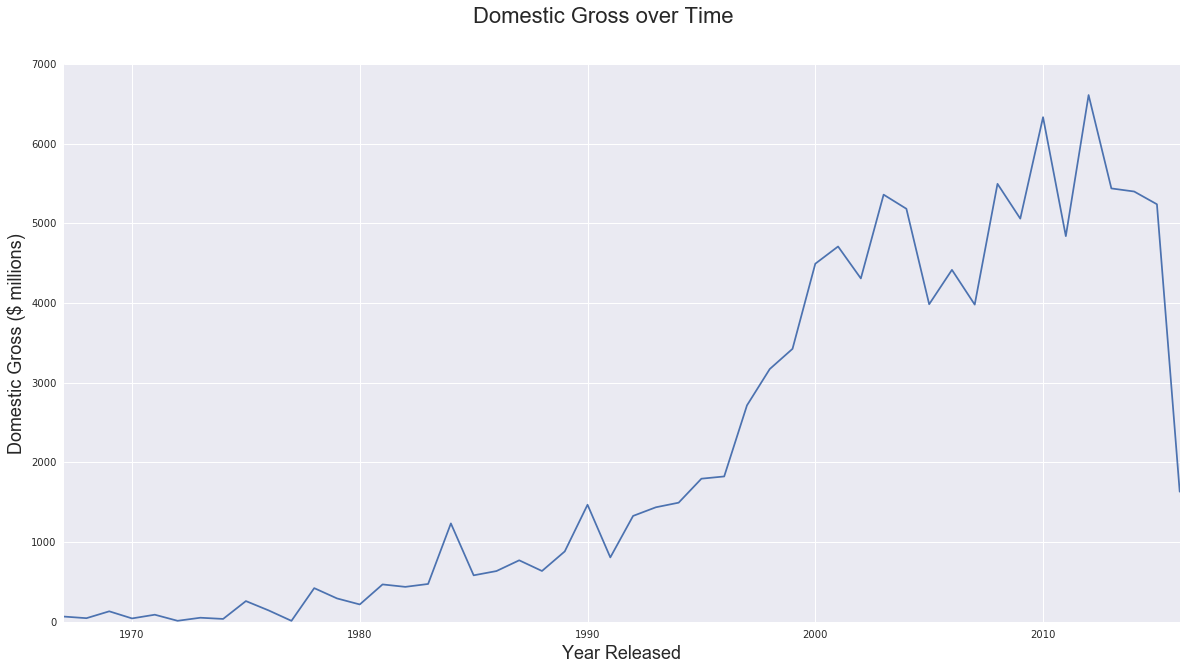

In [260]:
# easier to see trend when grouped by year released
plt.figure(figsize=(20,10))
plt.suptitle('Domestic Gross over Time',fontsize=22)
plt.ylabel('Domestic Gross ($ millions)',fontsize=18)
plt.xlabel('Year Released',fontsize=18)
plt.xlim(1967,2016)
sns.set_style("darkgrid")
plt.plot(df_1A.Year, df_1A.Dom_Gross)
plt.show()

## Answer for Challenge 1 is:
### Chart shown above
___

# Challenge 2
Plot runtime vs. domestic total gross.

In [261]:
# group movies by runtime
df_2 = df.groupby(['Runtime'])['Dom_Gross'].sum().reset_index()
df_2 = df_2.sort_values('Runtime')
df_2['Dom_Gross'] = df_2['Dom_Gross']/1000000
df_2 = df_2.set_index(df_2.Dom_Gross)

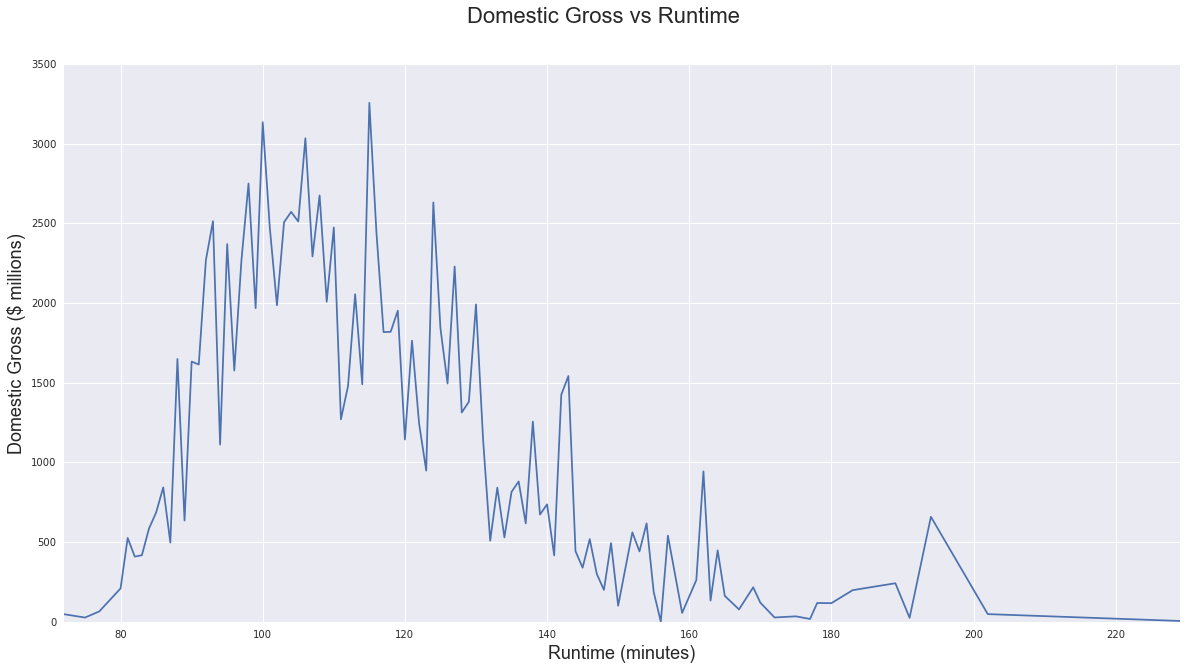

In [262]:
# 
plt.figure(figsize=(20,10))
plt.suptitle('Domestic Gross vs Runtime',fontsize=22)
plt.ylabel('Domestic Gross ($ millions)',fontsize=18)
plt.xlabel('Runtime (minutes)',fontsize=18)
plt.xlim(72,229)
sns.set_style("darkgrid")
plt.plot(df_2.Runtime, df_2.Dom_Gross)
plt.show()

In [267]:
import math
roundup = lambda x: int(math.ceil(x / 10.0)) * 10
# group movies by runtime rounded up to nearest 10
df_2['Runtime'] = df_2['Runtime'].apply(roundup)
df_2 = df_2.groupby(['Runtime'])['Dom_Gross'].sum().reset_index()
df_2 = df_2.sort_values('Runtime')
df_2['Dom_Gross'] = df_2['Dom_Gross']/1000000
df_2 = df_2.set_index(df_2.Dom_Gross)

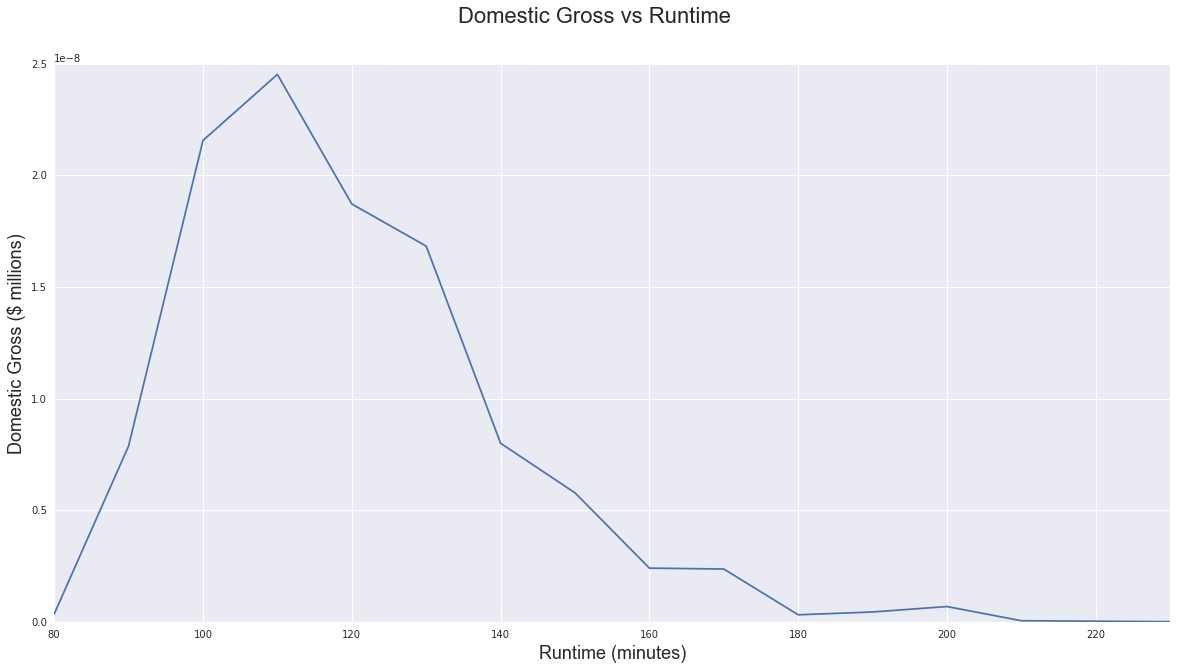

In [268]:
# rounded runtime up to nearest 10 and re-plotted for chart smoothing
plt.figure(figsize=(20,10))
plt.suptitle('Domestic Gross vs Runtime',fontsize=22)
plt.ylabel('Domestic Gross ($ millions)',fontsize=18)
plt.xlabel('Runtime (minutes)',fontsize=18)
plt.xlim(80,230)
sns.set_style("darkgrid")
plt.plot(df_2.Runtime, df_2.Dom_Gross)
plt.show()

## Answer for Challenge 2 is:
### Chart shown above
___

# Challenge 3
Group your data by Rating and find the average runtime and domestic total gross at each level of Rating.

In [274]:
df_3 = df.groupby(['Rated'])['Runtime', 'Dom_Gross'].mean()
df_3

,Runtime,Dom_Gross
Rated,,
APPROVED,145.666667,3.346898e+07
G,98.952381,1.569702e+08
GP,120.000000,4.380000e+07
M,131.666667,4.370297e+07
NC-17,128.000000,2.035075e+07
NOT RATED,92.000000,0.000000e+00
PG,105.498054,9.202430e+07
PG-13,110.564565,7.495886e+07
R,111.000000,4.727382e+07


## Answer for Challenge 3 is:
### Dataframe shown above (df_3)
___

# Challenge 4
Make one figure with (N=the number of MPAA ratings there are) subplots, and in each plot the release date vs the domestic total gross.

## Answer for Challenge 4 is:
### 
___

# Challenge 5
What director in your dataset has the highest gross per movie?

## Answer for Challenge 5 is:
### 
___

# Challenge 6
Bin your dataset into months and make a bar graph of the mean domestic total gross by month. Error bars will represent the standard error of the mean.

Title of graph should include: Mean Domestic Total Gross by Month in 2013

Topic for consideration: what is the correct formula for the standard error of the mean? Examine the error bars and see if they are "reasonable."

## Answer for Challenge 6 is:
### 
